#### 1. Import Libraries

In [132]:
import pyreadstat
import pandas as pd

pd.set_option("display.max_rows", None)  # show all rows if needed

#### 2. Load Data

In [133]:
file_path_men   = "men_and_womens_mobility_data/mn.sav"
file_path_women = "men_and_womens_mobility_data/wm.sav"

# read_sav returns (dataframe, metadata)
df_men, meta_men     = pyreadstat.read_sav(file_path_men)
df_women, meta_women = pyreadstat.read_sav(file_path_women)

print("Shape for Men Migration:", df_men.shape)
print("Shape for Women Migration:", df_women.shape)



Shape for Men Migration: (18466, 233)
Shape for Women Migration: (40326, 571)


#### 3. Extract Relevant Columns

In [134]:
# For men → MWB17 = previous state, HH7 = current state
men_df   = df_men[["MWB17", "HH7"]]
# For women → WB17 = previous state, HH7 = current state
women_df = df_women[["WB17", "HH7"]]

# Extract variable labels from metadata
men_meta   = {col: meta_men.column_labels[df_men.columns.get_loc(col)] for col in ["MWB17", "HH7"]}
women_meta = {col: meta_women.column_labels[df_women.columns.get_loc(col)] for col in ["WB17", "HH7"]}

print("\nMen Metadata:")
for short, full in men_meta.items():
    print(f"{short} --> {full}")

print("\nWomen Metadata:")
for short, full in women_meta.items():
    print(f"{short} --> {full}")



Men Metadata:
MWB17 --> State prior to moving to current place
HH7 --> Region

Women Metadata:
WB17 --> State prior to moving to current place
HH7 --> Region


#### 4. Filter and Clean Data

In [135]:
# Keep only valid codes (1–37), drop 96/99 etc.
men_filtered = (
    men_df[(men_df["MWB17"].fillna(0) <= 37) & (men_df["HH7"].fillna(0) <= 37)]
    .astype({"MWB17": "Int64", "HH7": "Int64"})   # Int64 keeps NaN support
)

women_filtered = (
    women_df[(women_df["WB17"].fillna(0) <= 37) & (women_df["HH7"].fillna(0) <= 37)]
    .astype({"WB17": "Int64", "HH7": "Int64"})
)

print("\nMen Filtered Shape:", men_filtered.shape)
print("Women Filtered Shape:", women_filtered.shape)


Men Filtered Shape: (18399, 2)
Women Filtered Shape: (40169, 2)


#### 5. Summary Stats (Men & Women)

In [136]:
# Unique values + frequency counts
print("\nMen Unique MWB17:", sorted(men_filtered["MWB17"].dropna().unique().tolist()))
print("Men Unique HH7:", sorted(men_filtered["HH7"].dropna().unique().tolist()))
print("Men MWB17 counts:\n", men_filtered["MWB17"].value_counts().sort_index())
print("Men HH7 counts:\n", men_filtered["HH7"].value_counts().sort_index())

print("\nWomen Unique WB17:", sorted(women_filtered["WB17"].dropna().unique().tolist()))
print("Women Unique HH7:", sorted(women_filtered["HH7"].dropna().unique().tolist()))
print("Women WB17 counts:\n", women_filtered["WB17"].value_counts().sort_index())
print("Women HH7 counts:\n", women_filtered["HH7"].value_counts().sort_index())


Men Unique MWB17: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Men Unique HH7: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Men MWB17 counts:
 MWB17
1     100
2     460
3     177
4     156
5      67
6     225
7     155
8     399
9      92
10    179
11     46
12    257
13    129
14    177
15    115
16     85
17    266
18    102
19    311
20     28
21     34
22    460
23    319
24    565
25     61
26    344
27    151
28    110
29    268
30    194
31    111
32    115
33    278
34    320
35    420
36    235
37    303
Name: count, dtype: Int64
Men HH7 counts:
 HH7
1     467
2     791
3     474
4     350
5     730
6     354
7     481
8     656
9     358
10    353
11    443
12    386
13    285
14    437
15    620
16    396
17    597
18    522
19    654
20    579
21    674
22    432
23    489
24    406
25 

##### 6. Migration Matrices

In [137]:
# Cross-tabulation: Previous state vs Current state
men_matrix   = pd.crosstab(men_filtered["MWB17"], men_filtered["HH7"])
women_matrix = pd.crosstab(women_filtered["WB17"], women_filtered["HH7"])

print("\nMen Migration Matrix:\n", men_matrix)
print("\nWomen Migration Matrix:\n", women_matrix)


Men Migration Matrix:
 HH7    1    2    3    4   5    6   7    8   9    10  ...  28   29   30  31  \
MWB17                                                ...                     
1      76    1    2    5   0    4   0    0   2    0  ...   0    0    0   0   
2       0  438    0    0   0    0   1    3   0    4  ...   0    0    1   0   
3       4    1  136    1   0    3   0    0  13    1  ...   0    0    1   0   
4       4    0    4  105   0    5   0    0   0    5  ...   0    0    0   0   
5       0    1    0    0  27    0   0    1   0    0  ...   0    0    0   6   
6       1    0    1    0   0  211   0    0   0    4  ...   0    0    0   0   
7       0    0    0    0   0    3  97    1   0    0  ...   3    1    6   1   
8       0    6    0    0   1    0   0  362   0    0  ...   0    1    0   1   
9       0    0   14    0   0    2   0    0  50    1  ...   7    2    0   0   
10      0    0    3    2   0   16   0    0   0  133  ...   1    0    0   1   
11      2    0    1    5   0    0   1   

#### 7. Combine Men & Women

In [138]:
# Rename columns so both datasets align
men_filtered   = men_filtered.rename(columns={"MWB17": "PrevPlace", "HH7": "CurrentPlace"})
women_filtered = women_filtered.rename(columns={"WB17": "PrevPlace", "HH7": "CurrentPlace"})

# Concatenate into one combined dataset
combined_df = pd.concat([men_filtered, women_filtered], ignore_index=True)
combined_df = combined_df.dropna(subset=["PrevPlace", "CurrentPlace"]).copy()

# Show summary of combined dataset
print("\nCombined Dataset Shape:", combined_df.shape)
print("Combined Unique PrevPlace:", sorted(combined_df["PrevPlace"].dropna().unique().tolist()))
print("Combined Unique CurrentPlace:", sorted(combined_df["CurrentPlace"].dropna().unique().tolist()))
print("PrevPlace counts:\n", combined_df["PrevPlace"].value_counts().sort_index())
print("CurrentPlace counts:\n", combined_df["CurrentPlace"].value_counts().sort_index())



Combined Dataset Shape: (30416, 2)
Combined Unique PrevPlace: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Combined Unique CurrentPlace: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
PrevPlace counts:
 PrevPlace
1      787
2     1395
3      983
4      721
5     1030
6      659
7      935
8      917
9      545
10     714
11     569
12     809
13     406
14     943
15     913
16     565
17    1038
18     687
19    1039
20     608
21     486
22    1317
23     899
24    1892
25     535
26    1040
27     711
28     482
29     957
30     573
31     764
32     576
33     771
34     716
35    1135
36     604
37     695
Name: count, dtype: Int64
CurrentPlace counts:
 CurrentPlace
1      818
2     1348
3     1005
4      750
5     1000
6      787
7      789
8      869
9      529
10     722
11     482
12     89

#### 8. Build Combined Matrix with Numeric Codes

In [139]:
combined_matrix = pd.crosstab(combined_df["PrevPlace"], combined_df["CurrentPlace"])
print("Matrix shape:", combined_matrix.shape)
print("\nCombined Migration Matrix:\n", combined_matrix)

Matrix shape: (37, 37)

Combined Migration Matrix:
 CurrentPlace   1     2    3    4    5    6    7    8    9    10  ...   28  \
PrevPlace                                                        ...        
1             664     1    4   16    0    9    0    1    9    1  ...    1   
2               6  1276    3    2    3    0    2   17    0    5  ...    0   
3               7     3  838    5    0    9    1    0   53    6  ...    3   
4              15     2    6  507    4    5    2    0    4   21  ...    1   
5               0     7    0    2  896    0    0    6    0    0  ...    0   
6               1     1    3    0    0  618    0    0    0   10  ...    1   
7               1     0    0    3    0    6  724    1    5    5  ...   10   
8               1    32    0    0    4    0    2  770    0    0  ...    0   
9               1     1   33    6    0    6    2    3  400    2  ...   19   
10              3     0    7   13    0   55    1    1    2  532  ...    3   
11              9     0 

#### 9. State Mapping (1–37 codes)

In [140]:
# Mapping of SPSS codes (1–37) to Nigerian States + FCT
state_mapping = {
    1: "Abia", 2: "Adamawa", 3: "Akwa Ibom", 4: "Anambra", 5: "Bauchi", 6: "Bayelsa",
    7: "Benue", 8: "Borno", 9: "Cross River", 10: "Delta", 11: "Ebonyi", 12: "Edo",
    13: "Ekiti", 14: "Enugu", 15: "Gombe", 16: "Imo", 17: "Jigawa", 18: "Kaduna",
    19: "Kano", 20: "Katsina", 21: "Kebbi", 22: "Kogi", 23: "Kwara", 24: "Lagos",
    25: "Nasarawa", 26: "Niger", 27: "Ogun", 28: "Ondo", 29: "Osun", 30: "Oyo",
    31: "Plateau", 32: "Rivers", 33: "Sokoto", 34: "Taraba", 35: "Yobe", 36: "Zamfara",
    37: "FCT"
}

#### 10. Add State Names & Filter NaN

In [141]:
combined_df["PrevPlaceName"] = combined_df["PrevPlace"].map(state_mapping)
combined_df["CurrentPlaceName"] = combined_df["CurrentPlace"].map(state_mapping)

# Drop rows with NaN in either PrevPlace or CurrentPlace
combined_filtered_df = combined_df.dropna(subset=["PrevPlaceName", "CurrentPlaceName"]).copy()
print(combined_filtered_df.head())


   PrevPlace  CurrentPlace PrevPlaceName CurrentPlaceName
1          1             1          Abia             Abia
2          1             1          Abia             Abia
3          1             1          Abia             Abia
4          1             1          Abia             Abia
5          1             1          Abia             Abia


#### 11. Combined Matrix with State Names

In [142]:
combined_migration_matrix = pd.crosstab(
    combined_filtered_df["PrevPlaceName"], 
    combined_filtered_df["CurrentPlaceName"]
)
print("Matrix shape (names):", combined_migration_matrix.shape)
print("\nCombined Migration Matrix (names):\n", combined_migration_matrix)


Matrix shape (names): (37, 37)

Combined Migration Matrix (names):
 CurrentPlaceName  Abia  Adamawa  Akwa Ibom  Anambra  Bauchi  Bayelsa  Benue  \
PrevPlaceName                                                                 
Abia               664        1          4       16       0        9      0   
Adamawa              6     1276          3        2       3        0      2   
Akwa Ibom            7        3        838        5       0        9      1   
Anambra             15        2          6      507       4        5      2   
Bauchi               0        7          0        2     896        0      0   
Bayelsa              1        1          3        0       0      618      0   
Benue                1        0          0        3       0        6    724   
Borno                1       32          0        0       4        0      2   
Cross River          1        1         33        6       0        6      2   
Delta                3        0          7       13       0    

#### 12. Heatmap with Seaborn

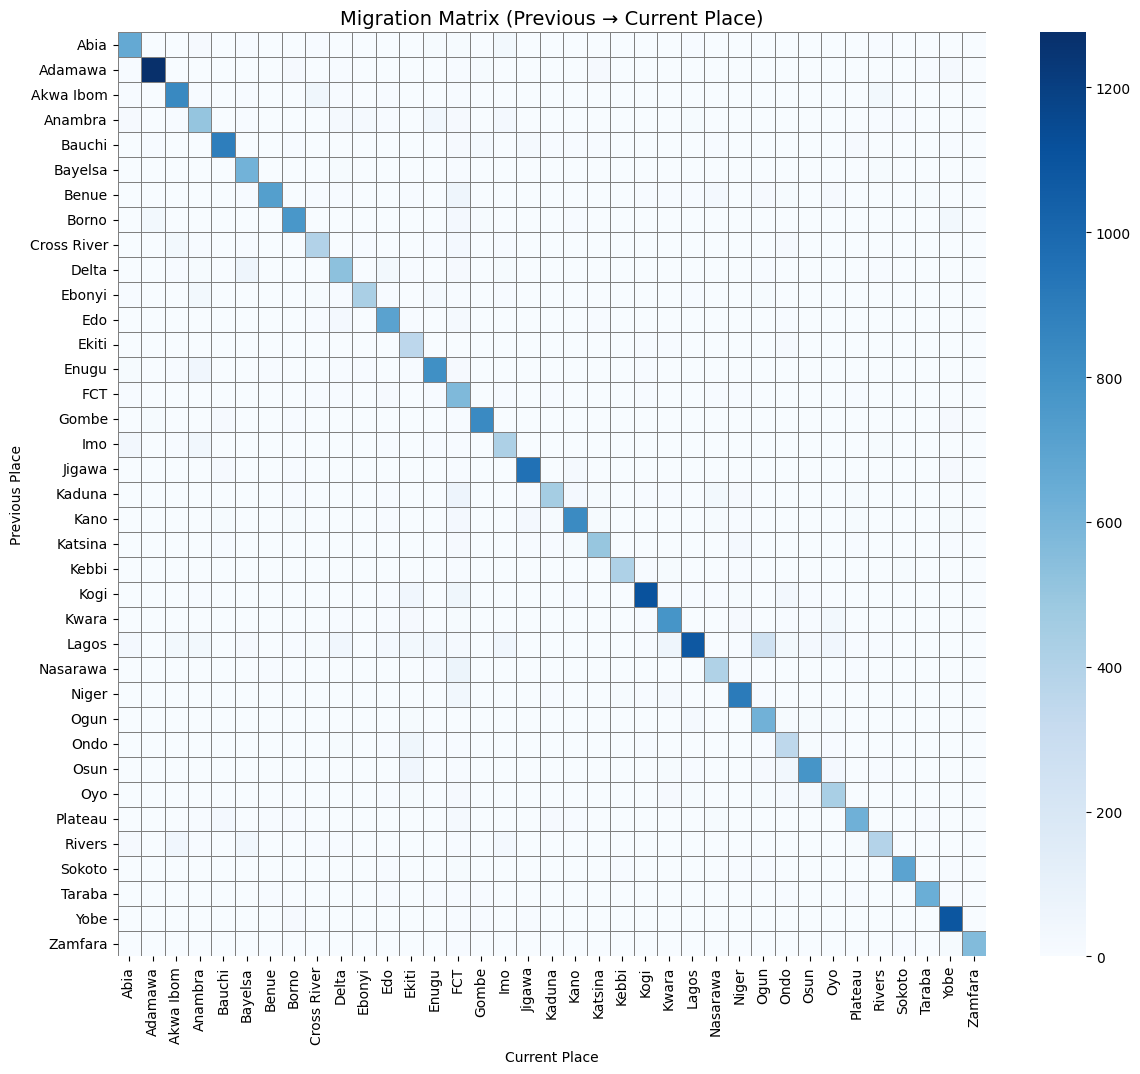

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
sns.heatmap(combined_migration_matrix, 
            cmap="Blues", 
            linewidths=0.5, 
            linecolor="gray")

plt.title("Migration Matrix (Previous → Current Place)", fontsize=14)
plt.xlabel("Current Place")
plt.ylabel("Previous Place")
plt.show()


#### 13. Heatmap with Matplotlib (Checkerboard)

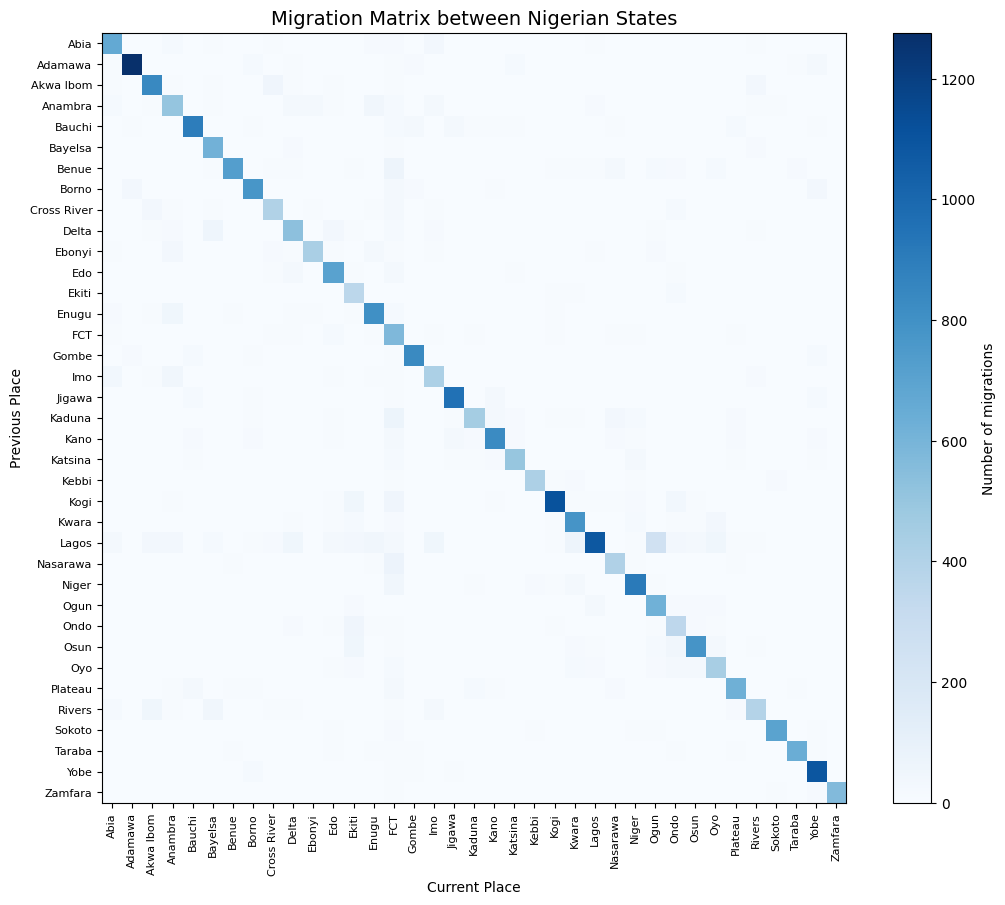

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.imshow(combined_migration_matrix, cmap="Blues", aspect="auto")
plt.colorbar(label="Number of migrations")

plt.xticks(
    range(len(combined_migration_matrix.columns)), 
    combined_migration_matrix.columns, rotation=90, fontsize=8
)
plt.yticks(
    range(len(combined_migration_matrix.index)), 
    combined_migration_matrix.index, fontsize=8
)

plt.xlabel("Current Place")
plt.ylabel("Previous Place")
plt.title("Migration Matrix between Nigerian States", fontsize=14)
plt.show()


#### 14. Sankey Diagram with Plotly

In [152]:
import plotly.graph_objects as go

# Aggregate flows (from PrevPlaceName to CurrentPlaceName)
flow = combined_filtered_df.groupby(
    ["PrevPlaceName", "CurrentPlaceName"]
).size().reset_index(name="count")

# Create mapping from state names to indices
state_list = list(state_mapping.values())
state_index = {state: i for i, state in enumerate(state_list)}

# Build Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(label=state_list, pad=15, thickness=15),
    link=dict(
        source=flow["PrevPlaceName"].map(state_index),
        target=flow["CurrentPlaceName"].map(state_index),
        value=flow["count"]
    )
)])
fig.update_layout(title_text="State-to-State Migration", font_size=10)
fig.show()


In [153]:
# Coordinates for Nigerian States
state_coords = {
    "Abia": (5.5320, 7.4860), 
    "Adamawa": (9.3265, 12.3984), 
    "Akwa Ibom": (4.9268, 7.8722), 
    "Anambra": (6.2100, 7.0700),
    "Bauchi": (10.3103, 9.8439),
    "Bayelsa": (4.9220, 6.2649),
    "Benue": (7.1907, 8.1290),
    "Borno": (11.8333, 13.1500),
    "Cross River": (4.9517, 8.3220),
    "Delta": (5.4650, 6.2019),
    "Ebonyi": (6.3249, 8.1137),
    "Edo": (6.3350, 5.6275),
    "Ekiti": (7.6233, 5.2214),
    "Enugu": (6.4527, 7.5103),
    "Gombe": (10.2897, 11.1700),
    "Imo": (5.4836, 7.0333),
    "Jigawa": (12.0000, 9.7667),
    "Kaduna": (10.5231, 7.4403),
    "Kano": (12.0022, 8.5919),
    "Katsina": (12.9889, 7.6000),
    "Kebbi": (12.4500, 4.2000),
    "Kogi": (7.8000, 6.7333),
    "Kwara": (8.5000, 4.5500),
    "Lagos": (6.5244, 3.3792),
    "Nasarawa": (8.5333, 8.5333),
    "Niger": (9.6000, 6.5500),
    "Ogun": (7.0000, 3.5833),
    "Ondo": (7.2500, 5.2000),
    "Osun": (7.7833, 4.5667),
    "Oyo": (7.3833, 3.9333),
    "Plateau": (9.9333, 8.8833),
    "Rivers": (4.8242, 7.0336),
    "Sokoto": (13.0667, 5.2333),
    "Taraba": (8.8833, 11.3667),
    "Yobe": (12.0000, 11.7500),
    "Zamfara": (12.1667, 6.2500),
    "FCT": (9.0579, 7.4951)
}


In [154]:
# Aggregate flows from your migration dataset 
# Count flows from previous → current state
flow_data = combined_filtered_df.groupby(
    ["PrevPlaceName", "CurrentPlaceName"]
).size().reset_index(name="count")

# Remove diagonal (people who stayed in same state)
flow_data = flow_data[flow_data["PrevPlaceName"] != flow_data["CurrentPlaceName"]]


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Normalize line width for flows
max_val = flow_data["count"].max()

# Migration flows (all in blue, single legend entry)
for i, row in flow_data.iterrows():
    src, dst, val = row["PrevPlaceName"], row["CurrentPlaceName"], row["count"]
    if src in state_coords and dst in state_coords:
        lat_src, lon_src = state_coords[src]
        lat_dst, lon_dst = state_coords[dst]

        fig.add_trace(go.Scattergeo(
            lon=[lon_src, lon_dst],
            lat=[lat_src, lat_dst],
            mode="lines",
            line=dict(width=(val / max_val) * 10, color="blue"),
            opacity=0.3,
            hoverinfo="text",
            text=f"{src} → {dst}: {val}",
            name="Migration Flow" if i == 0 else None,
            showlegend=(i == 0),
            legendgroup="flows"
        ))

# Add state capital markers
highlight_colors = {"Ondo": "green", "Bauchi": "orange", "Edo": "purple"}

for j, (state, (lat, lon)) in enumerate(state_coords.items()):
    if state in highlight_colors:
        fig.add_trace(go.Scattergeo(
            lon=[lon], lat=[lat],
            text=f"{state}",
            mode="markers+text",
            marker=dict(size=8, color=highlight_colors[state], symbol="star"),
            textposition="top center",
            hoverinfo="text",
            name=f"{state} Capital",
            showlegend=True
        ))
    else:
        fig.add_trace(go.Scattergeo(
            lon=[lon], lat=[lat],
            text=state,
            mode="markers+text",
            marker=dict(size=6, color="red", symbol="circle"),
            textposition="top center",
            hoverinfo="text",
            name="Other Capitals" if j == 0 else None,
            showlegend=(j == 0),
            legendgroup="others"
        ))

# Configure map
fig.update_layout(
    title_text="Nigeria State-to-State Migration Flows (with Ondo, Bauchi, Edo highlighted)",
    showlegend=True,
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    geo=dict(
        scope="africa",
        center=dict(lat=9.0, lon=8.0),
        projection_scale=7.5,
        showland=True,
        landcolor="rgb(243, 243, 243)",
        countrycolor="gray"
    ),
    width=1100,
    height=850
)

fig.show()


In [183]:
# Immigration totals per state
state_counts = combined_filtered_df["CurrentPlaceName"].value_counts().reset_index()
state_counts.columns = ["State", "Count"]

# Total migrants in dataset
total_migrants = state_counts["Count"].sum()

# Selected states
selected = ["Ondo", "Bauchi", "Edo"]
selected_stats = state_counts[state_counts["State"].isin(selected)].copy()

# Add percentages
selected_stats["Percentage"] = (selected_stats["Count"] / total_migrants * 100).round(2)

print("Total Migrants:", total_migrants)
print(selected_stats)


Total Migrants: 30416
     State  Count  Percentage
9   Bauchi   1000        3.29
15     Edo    896        2.95
28    Ondo    590        1.94
